# **Data Collection and Preprocessing**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ="/content/drive/MyDrive/Programming/Divvy_Trips_2017_Q1.csv"
df_divv1 = pd.read_csv(path)
path2 = "/content/drive/MyDrive/Programming/Divvy_Stations_2017_Q1Q2.csv"
df_divv2 = pd.read_csv(path2)
path3 = "/content/drive/MyDrive/Programming/Divvy_Trips_2017_Q2.csv"
df_divv3 = pd.read_csv(path3)

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
!pip install calplot
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8115 sha256=d608701776608372c6ee9789d2b8fb28f0bb5015ba4e0194e9e6c4da62578332
  Stored in directory: /root/.cache/pip/wheels/77/75/32/a518a4a1421776a93e1ede33cb8dac474095bf31fed7e4e22c
Successfully built calplot


In [ ]:
# Set up prices for DIVVY in 2017
annual_price = 108
day_pass_price = 15
single_ride = 3.3

In [ ]:
# merging two csv files
df_final = pd.concat(
	map(pd.read_csv, ["/content/drive/MyDrive/Programming/Divvy_Trips_2017_Q1.csv", "/content/drive/MyDrive/Programming/Divvy_Trips_2017_Q2.csv"]), ignore_index=True)

Creating new data files that containing five key trip attributes for each journey: trip duration, date, month, hour, day of the week, age group, then mapping with the weather data .


In [ ]:
df_final.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               316867
birthyear            316683
dtype: int64

In [ ]:
316867/1551505

0.2042320198774738

([<matplotlib.patches.Wedge at 0x78b2586882b0>,
 [Text(-0.7971153590642462, 0.7580284324112639, 'Male'),
  Text(0.7971153590642461, -0.7580284324112639, 'Female')],
 [Text(-0.43479019585322515, 0.41347005404250753, '75.8%'),
  Text(0.4347901958532251, -0.41347005404250753, '24.2%')])

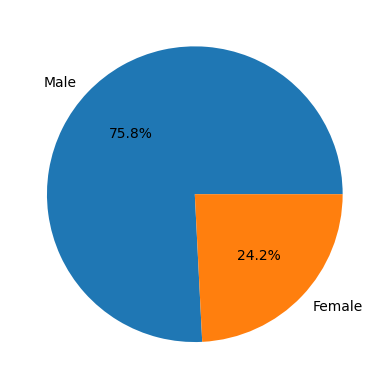

In [ ]:
gender_counts = df_final['gender'].value_counts()
plt.pie(list(gender_counts.values), labels = list(gender_counts.index), autopct = "%.1f%%")

([<matplotlib.patches.Wedge at 0x78b256554ee0>,
 [Text(-0.8808452983822798, 0.6588714292772397, 'Subscriber'),
  Text(0.8808399623418037, -0.6588785629702107, 'Customer'),
  Text(1.0999999999639327, -8.907753044157233e-06, 'Dependent')],
 [Text(-0.4804610718448798, 0.35938441596940346, '79.6%'),
  Text(0.4804581612773474, -0.3593883070746604, '20.4%'),
  Text(0.5999999999803269, -4.858774387722126e-06, '0.0%')])

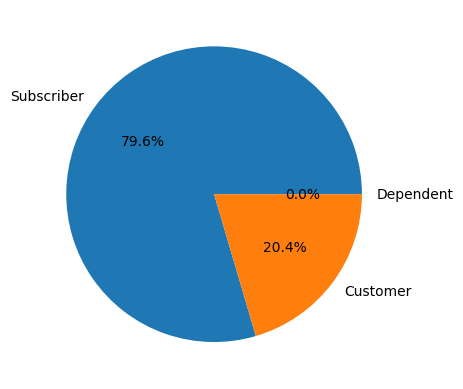

In [ ]:
usertype_counts = df_final['usertype'].value_counts()
plt.pie(list(usertype_counts.values), labels = list(usertype_counts.index), autopct = "%.1f%%")

In [ ]:
#Preparing dataset
df_final['gender'] = df_final['gender'].fillna(0)
df_final['birthyear'] = df_final['birthyear'].fillna(0)
def age(birthyear1):
      year = int(birthyear1)
      return abs(2017 - year)
df_final['Age']=df_final['birthyear'].apply(age)
def format_time(time):
    return(time.split(' ')[1])
def format_day(date):
    return(date.split(' ')[0])
def format_month(month):
  return(month.split('/')[0])
def format_date(day):
  return(day.split('/')[1])
def format_hour(hour):
  return(hour[0:2])

In [ ]:
df_final['time']=df_final['start_time'].apply(format_time)
df_final['start_date']=df_final['start_time'].apply(format_day)
df_final['month']=df_final['start_date'].apply(format_month)
df_final['date']=df_final['start_date'].apply(format_date)
df_final['hour']=df_final['time'].apply(format_hour)

In [ ]:
df_final["start_date"] = pd.to_datetime(df_final["start_date"])
df_final['weekday'] = df_final['start_date'].dt.dayofweek

In [ ]:
from datetime import *
# Get records of single ride

'''
Assumption:
      The riding time of single-ride is not short, at least 2 times of subscribers'.
'''
a = pd.to_datetime(df_final['end_time'],format="%m/%d/%Y %H:%M:%S") - pd.to_datetime(df_final['start_time'],format="%m/%d/%Y %H:%M:%S")
# Create Customer condition
conditions = [
    (df_final['usertype']=='Customer') & (a>timedelta(minutes=20)),
    (df_final['usertype']=='Subscriber'),
    (df_final['usertype']=='Customer') & (a<=timedelta(minutes=20))
    ]

# create a list of the values we want to assign for each condition
values = ['Single','Subscriber','Daypass']

# create a new column and use np.select to assign values to it using our lists as arguments
df_final['Newuser'] = np.select(conditions, values)

# **Exploration Data Analysis**





In [ ]:
df_final['trip_id'].count()

1551505

In [ ]:
df_final['tripduration'].sum()

1458069892

In [ ]:

trip_count = df_final.groupby('Newuser')['trip_id'].count()
trip_count

Newuser
0                   4
Daypass        126630
Single         190532
Subscriber    1234339
Name: trip_id, dtype: int64

In [ ]:
df_gender1 = pd.pivot_table(df_final,index=['Age'],columns ='gender',values='trip_id',aggfunc="count")
df_gender1 = df_gender1.reset_index()

In [ ]:
df_final.loc[df_final['Age']<=10, 'age_group'] = '0-10'
df_final.loc[df_final['Age'].between(11,20), 'age_group'] = '11-20'
df_final.loc[df_final['Age'].between(21,30), 'age_group'] = '21-30'
df_final.loc[df_final['Age'].between(31,40), 'age_group'] = '31-40'
df_final.loc[df_final['Age'].between(41,50), 'age_group'] = '41-50'
df_final.loc[df_final['Age'].between(51,60), 'age_group'] = '51-60'
df_final.loc[df_final['Age'].between(61,70), 'age_group'] = '61-70'
df_final.loc[df_final['Age'].between(71,80), 'age_group'] = '71-80'
df_final.loc[df_final['Age']>80, 'age_group'] = '80+'

In [ ]:

df_gender1 = pd.pivot_table(df_final,index=['age_group'],columns ='gender',values='trip_id',aggfunc="count")
df = df_gender1.reset_index()

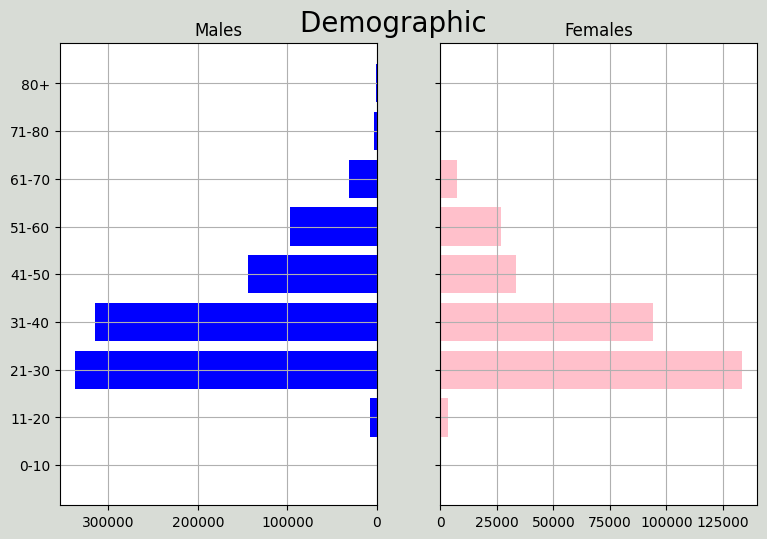

In [ ]:
#define x and y limits
y = range(0, len(df))
x_male = df['Male']
x_female = df['Female']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Demographic ", fontsize=20, ha='center')

#define male and female bars
axes[0].barh(y, x_male, align='center', color='blue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='pink')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y,yticklabels=df['age_group'])
axes[0].invert_xaxis()
axes[0].grid()


#display plot
plt.show()

In [ ]:
test3 = pd.pivot_table(df_final,index=['start_date','date','hour','month'],values=['tripduration','trip_id'],aggfunc={'tripduration':"sum",'trip_id':"count"})
test3 =test3.reset_index()
test3['Duration_minute'] = test3['tripduration']/60
test3 =test3.reset_index()

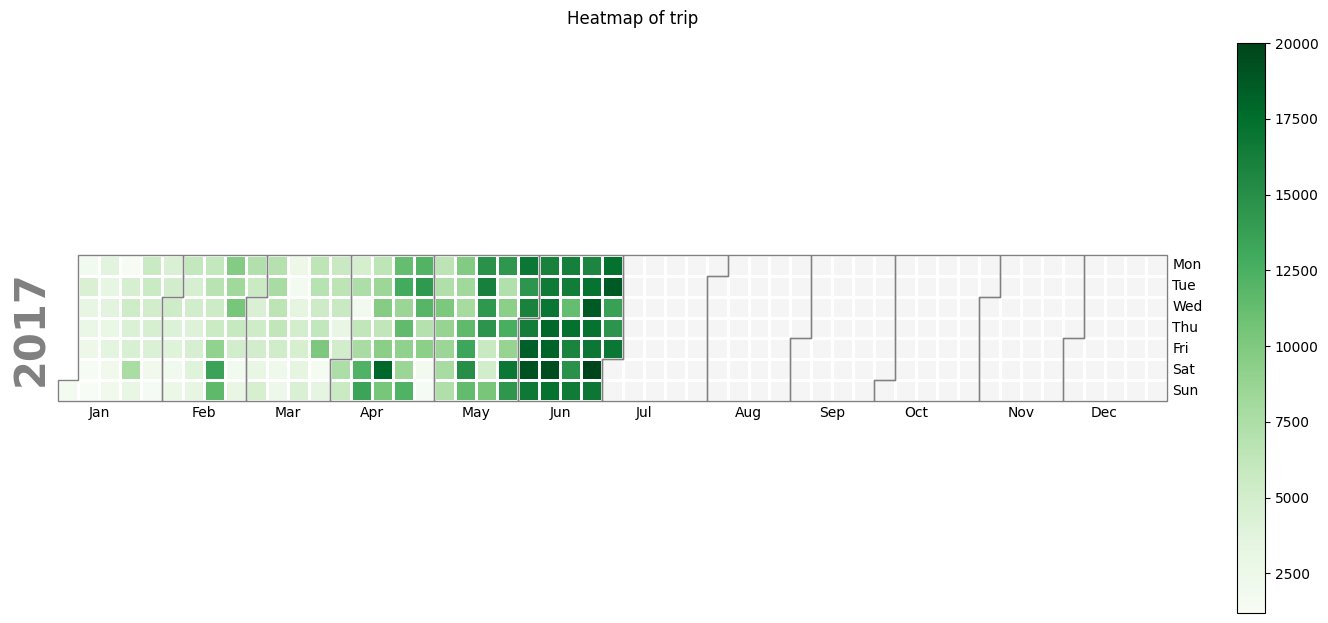

In [ ]:
df_final["start_date"] = pd.to_datetime(df_final["start_date"])
df_final.set_index("start_date", inplace = True)
pl1 = calplot.calplot(data = df_final['trip_id'],how = 'count', cmap = 'Greens', figsize = (15, 6), suptitle = "Heatmap of trip")

In [ ]:
df_final

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Age,time,month,date,hour,weekday,Newuser,age_group
start_date,,,,,,,,,,,,,,,,,,,,
2017-03-31,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,28,23:59:07,3,31,23,4,Subscriber,21-30
2017-03-31,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27,23:56:25,3,31,23,4,Subscriber,21-30
2017-03-31,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38,23:55:33,3,31,23,4,Subscriber,31-40
2017-03-31,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32,23:54:46,3,31,23,4,Subscriber,31-40
2017-03-31,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28,23:53:33,3,31,23,4,Subscriber,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-01,13518910,4/1/2017 00:06:30,4/1/2017 00:11:56,1796,326,296,Broadway & Belmont Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0,57,00:06:30,4,1,00,5,Subscriber,51-60
2017-04-01,13518909,4/1/2017 00:06:00,4/1/2017 00:20:53,22,893,199,Wabash Ave & Grand Ave,68,Clinton St & Tilden St,Subscriber,Male,1979.0,38,00:06:00,4,1,00,5,Subscriber,31-40
2017-04-01,13518908,4/1/2017 00:04:13,4/1/2017 00:19:20,1296,907,56,Desplaines St & Kinzie St,69,Damen Ave & Pierce Ave,Subscriber,Male,1993.0,24,00:04:13,4,1,00,5,Subscriber,21-30


In [ ]:
#weekday vs weekend
#filetered weekday & weekend rides separately and grouped by hour and member type
weekday_rides = df_final[df_final['weekday'].isin([1, 2, 3, 4, 0])].groupby(['hour', 'usertype']).agg({'trip_id':'count'}).reset_index()
weekend_rides = df_final[df_final['weekday'].isin([5, 6])].groupby(['hour', 'usertype']).agg({'trip_id':'count'})

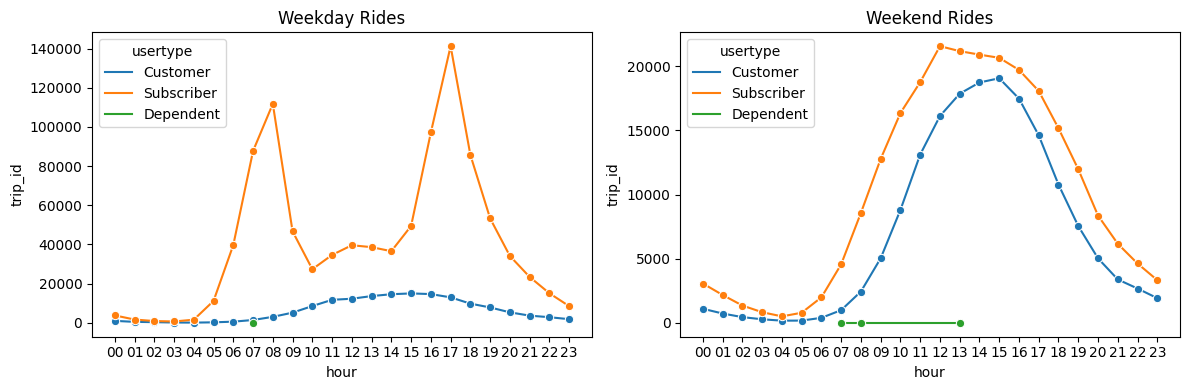

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(x='hour', y='trip_id', data=weekday_rides, hue='usertype', marker='o', ax=ax[0])
sns.lineplot(x='hour', y='trip_id', data=weekend_rides, hue='usertype', marker='o', ax=ax[1])
ax[0].set_title('Weekday Rides')
ax[1].set_title('Weekend Rides')
fig.tight_layout()
plt.show()

In [ ]:
# Get records of Subscribers
s_df = df_final[df_final['usertype']=='Subscriber']

# Calculate the average riding time for each trip
s_start= pd.to_datetime(s_df['start_time'],format="%m/%d/%Y %H:%M:%S")
s_end= pd.to_datetime(s_df['end_time'],format="%m/%d/%Y %H:%M:%S")

(s_end-s_start).mean()

Timedelta('0 days 00:11:39.761890372')

In [ ]:
from datetime import *
# Get records of single ride

'''
Assumption:
      The riding time of single-ride is not short, at least 2 times of subscribers'.
'''
a = pd.to_datetime(df_final['end_time'],format="%m/%d/%Y %H:%M:%S") - pd.to_datetime(df_final['start_time'],format="%m/%d/%Y %H:%M:%S")

ns_df = df_final[(df_final['usertype']=='Customer') & (a>timedelta(minutes=20))]

# Calculate the average riding time for each trip
sr_start= pd.to_datetime(ns_df['start_time'],format="%m/%d/%Y %H:%M:%S")
sr_end= pd.to_datetime(ns_df['end_time'],format="%m/%d/%Y %H:%M:%S")

(sr_end-sr_start).mean()

Timedelta('0 days 00:43:15.607630214')

In [ ]:
# Bicycle usage time (per dollar) --single ride

(43*60+16)/3.3

786.6666666666667

In [ ]:
# Bicycle usage time (per dollar) -- Annual Member

'''
The operator may consider some extreme cases:
Assumptions:
      1. Users do not like to ride bicycles in cold weather.
      2. Users do not like to ride bicycles on rainy days.
      3. Annual Member mainly use bicycles on their workdays.
      4. Users do not use bicycles more than twice a day(e.g.: 1.5/day).

Taking the above assumptions into account, each user uses a bicycle approximately 164 times per year.
'''

(11*60+40)*164/108

1062.962962962963

In [ ]:
786.6666666666667/1062.962962962963

0.7400696864111498

In [ ]:
#Estimate number of subscribers
1458069892/((11*60+40)*82)

25401.91449477352

In [ ]:
#Revenue per month of subscriber
25402*108/12

228618.0

In [ ]:
#Average revenue by Single ride
(190532)*3.3/6

104792.59999999999

In [ ]:
#Cost per bike yearly
4000*17125/9997

6852.055616685006

# **Calculating the correlation between Customer demand and weather factor**

Before conducting pricing analysis, we need to first analyze bike trip demand trends by examining the correlation between the number of trips taken and weather factors.

In [ ]:
# Addition data of Chicago weather
path ="/content/drive/MyDrive/Programming/USA Chicago 2017-01-01 to 2017-12-31.csv"
df_chicago = pd.read_csv(path)
df_chicago.reset_index()
df_chicago['datetime'] = pd.to_datetime(df_chicago['datetime'])

In [ ]:
test4 = pd.pivot_table(df_final,index=['start_date','date','month','usertype','Newuser'],values=['tripduration','trip_id'],aggfunc={'tripduration':"sum",'trip_id':"count"})
test4 =test4.reset_index()
test4['Duration_minute'] = test4['tripduration']/60
test4 =test4.reset_index()
test4

,index,start_date,date,month,usertype,Newuser,trip_id,tripduration,Duration_minute
0,0,2017-01-01,1,1,Customer,Daypass,172,138800,2313.333333
1,1,2017-01-01,1,1,Customer,Single,168,476023,7933.716667
2,2,2017-01-01,1,1,Subscriber,Subscriber,1387,938021,15633.683333
3,3,2017-01-02,2,1,Customer,Daypass,57,44560,742.666667
4,4,2017-01-02,2,1,Customer,Single,82,168590,2809.833333
...,...,...,...,...,...,...,...,...,...
542,542,2017-06-29,29,6,Customer,Single,1086,2741723,45695.383333
543,543,2017-06-29,29,6,Subscriber,Subscriber,12783,9215755,153595.916667
544,544,2017-06-30,30,6,Customer,Daypass,1359,1079455,17990.916667
545,545,2017-06-30,30,6,Customer,Single,2220,5949976,99166.266667


In [ ]:
test5 = pd.pivot_table(df_final,index=['start_date','date','month','hour','usertype','Newuser'],values=['tripduration','trip_id'],aggfunc={'tripduration':"sum",'trip_id':"count"})
test5 =test5.reset_index()
test5['Duration_minute'] = test5['tripduration']/60
test5 =test5.reset_index()
test5

,index,start_date,date,month,hour,usertype,Newuser,trip_id,tripduration,Duration_minute
0,0,2017-01-01,1,1,00,Customer,Daypass,9,5491,91.516667
1,1,2017-01-01,1,1,00,Customer,Single,4,6670,111.166667
2,2,2017-01-01,1,1,00,Subscriber,Subscriber,33,60049,1000.816667
3,3,2017-01-01,1,1,01,Customer,Daypass,3,2583,43.050000
4,4,2017-01-01,1,1,01,Customer,Single,1,1805,30.083333
...,...,...,...,...,...,...,...,...,...,...
10891,10891,2017-06-30,30,6,22,Customer,Single,59,137167,2286.116667
10892,10892,2017-06-30,30,6,22,Subscriber,Subscriber,270,214843,3580.716667
10893,10893,2017-06-30,30,6,23,Customer,Daypass,41,32075,534.583333
10894,10894,2017-06-30,30,6,23,Customer,Single,70,153963,2566.050000


In [ ]:
pd.pivot_table(test5,index=['Newuser'],values=['trip_id'],aggfunc="sum")


,trip_id
Newuser,
0,4
Daypass,126630
Single,190532
Subscriber,1234339


In [ ]:
# merging two csv files
df_weather = pd.merge(test4,df_chicago,how ="left",left_on ='start_date',right_on = 'datetime')
df_weather['month'] = df_weather['month'].astype(int)
df_weather['date'] = df_weather['date'].astype(int)

In [ ]:
# merging two csv files
df_weather_hour = pd.merge(test5,df_chicago,how ="left",left_on ='start_date',right_on = 'datetime')
df_weather_hour['month'] = df_weather['month'].astype(int)
df_weather_hour['date'] = df_weather['date'].astype(int)

In [ ]:
#Rain condition
conditions = [
    (df_weather['icon'] == 'rain'),
    (df_weather['icon'] != 'rain')
    ]

# create a list of the values we want to assign for each condition
values = ['1','0']

# create a new column and use np.select to assign values to it using our lists as arguments
df_weather['rain'] = np.select(conditions, values)
# Snow condition
conditions1 = [
    (df_weather['icon'] == 'snow'),
    (df_weather['icon'] != 'snow')
    ]

# create a list of the values we want to assign for each condition
values = ['1','0']

# create a new column and use np.select to assign values to it using our lists as arguments
df_weather['snow'] = np.select(conditions1, values)

In [ ]:
df_weather['rain'] = df_weather['rain'].astype(int)
df_weather['snow'] = df_weather['snow'].astype(int)

In [ ]:
# Add column for season
df_weather['season'] = df_weather['start_date'].apply(lambda x: 'winter' if x.month in [11,12,1,2,3] else 'summer')

In [ ]:
df_weather1= df_weather[['trip_id','temp', 'humidity', 'windspeed', 'precip']]
df_weather2= df_weather[['trip_id','temp', 'humidity', 'windspeed', 'precip','rain','usertype','Newuser']]

In [ ]:
X = df_weather1.iloc[:, 1].values.reshape(-1, 1)
y = df_weather1.iloc[:, 0].values.reshape(-1, 1)

In [ ]:
#Splitting the dataset into the Training Set and Test Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

In [ ]:
#Fitting Simple Linear Regression to the Training Set

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Calculating the Coefficients
reg.coef_

#Calculating the R Squared Value
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score:  0.19977733469121028


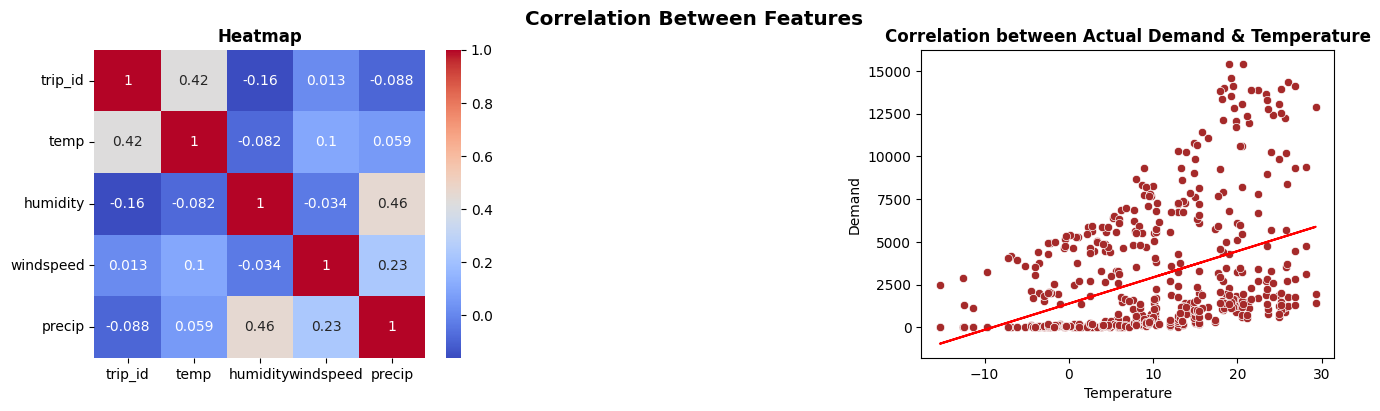

In [ ]:
#Heatmap & Correlation between Actual Demand & Temperature

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

sns.heatmap(ax=ax[0], data=df_weather1.corr(), annot=True, cmap='coolwarm')
ax[0].set_title('Heatmap', fontweight='bold')

sns.scatterplot(ax=ax[1], data=df_weather2, y='trip_id', x='temp', color='brown')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Demand')
ax[1].plot(X_test, y_pred, color='red')
ax[1].set_title('Correlation between Actual Demand & Temperature', fontweight='bold')

plt.subplots_adjust(wspace = 1)
fig.suptitle('Correlation Between Features', fontweight='heavy', size='x-large')
plt.show()

In [ ]:
 df_weather2.drop(df_weather2.loc[df_weather2['rain'] == 1].index, inplace=True)
df_weather2 = df_weather2[df_weather2['usertype'] != 'Subscriber']

<ipython-input-52-67b72df43af0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather2.drop(df_weather2.loc[df_weather2['rain'] == 1].index, inplace=True)


In [ ]:
X1 = df_weather2.iloc[:, 1].values.reshape(-1, 1)
y1 = df_weather2.iloc[:, 0].values.reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.5, random_state=100)
reg = LinearRegression()
reg.fit(X1_train, y1_train)
#Calculating the R Squared Value for customer only
from sklearn.metrics import r2_score
y1_pred = reg.predict(X1_test)
print('R2 Score: ', r2_score(y1_test, y1_pred))

R2 Score:  0.49212601288656965


<ipython-input-54-9e48be7d3c7d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ax=ax[0], data=df_weather2.corr(), annot=True, cmap='coolwarm')


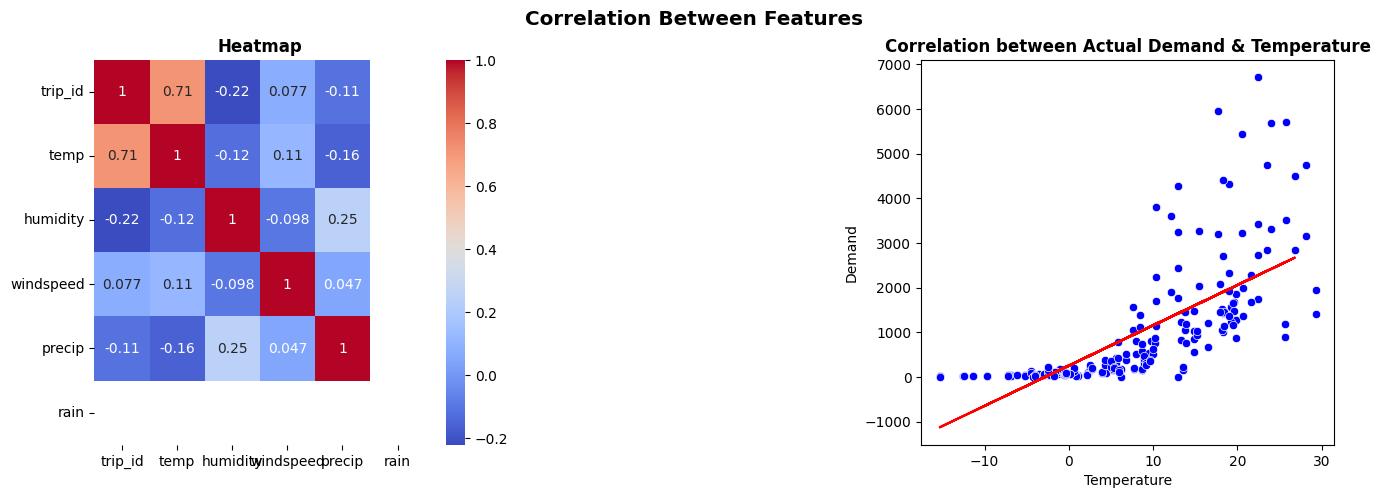

In [ ]:
#Heatmap & Correlation between Actual Demand & Temp exclude rain effect

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.heatmap(ax=ax[0], data=df_weather2.corr(), annot=True, cmap='coolwarm')
ax[0].set_title('Heatmap', fontweight='bold')

sns.scatterplot(ax=ax[1], data=df_weather2, y='trip_id', x='temp', color='blue')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Demand')
ax[1].plot(X1_test, y1_pred, color='red')
ax[1].set_title('Correlation between Actual Demand & Temperature', fontweight='bold')

plt.subplots_adjust(wspace = 1)
fig.suptitle('Correlation Between Features', fontweight='heavy', size='x-large')
plt.show()

Delving into Customer only we can clearly see the the impact of temperature when excluding the effect of rain is 0.74 which can be assumed as positive correlation

Based on the correlation analysis, bike trip demand tends to increase as temperatures rise, reaching peak demand around 20°C. Demand then decreases slightly as temperatures continue to rise beyond 20°C.

So which the demand analysis above, we should not fixed the price but let flexible during the temperature as it is the main factor impact to demand and Chicago comes to the half second of 2017 where the temperature assumed to be low.

Base on the correlation between the Demand and Temperature. Assuming that the demand of customer only change when degree higher than 10. Therefore calculate the  

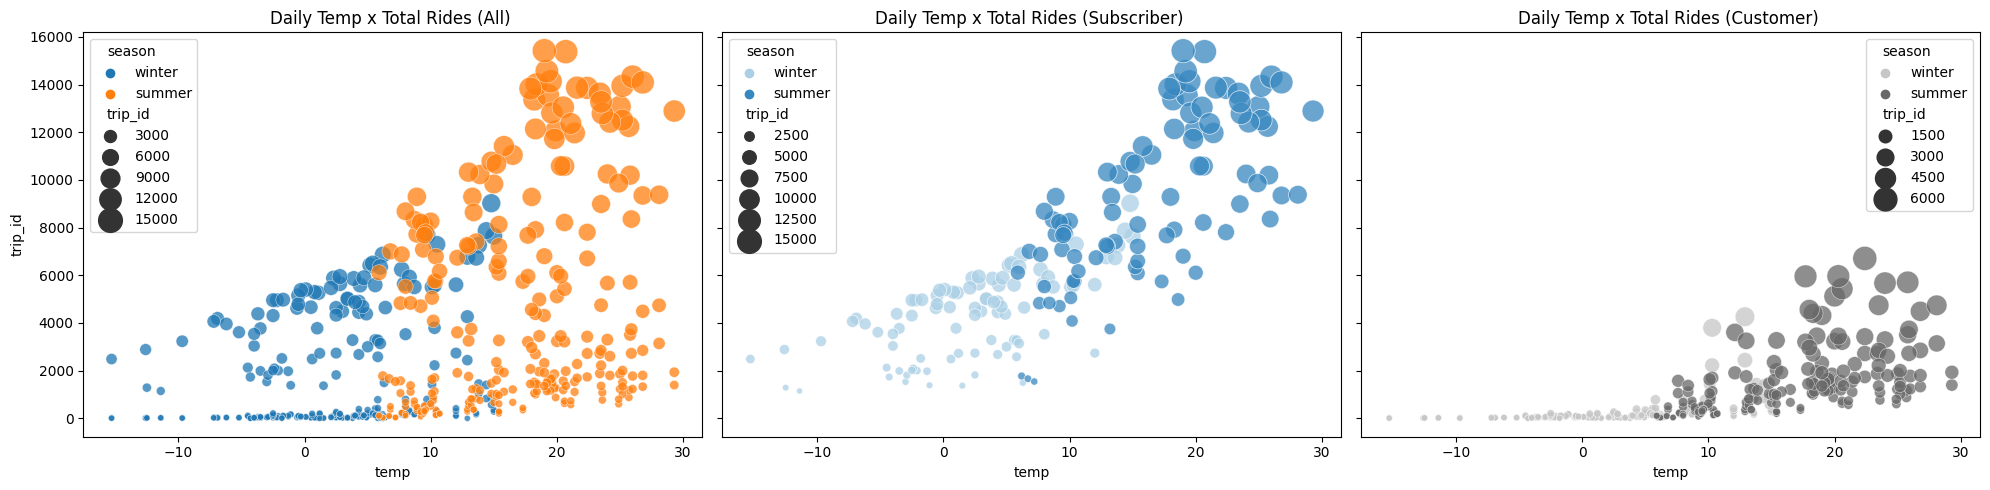

In [ ]:
daily_mem=df_weather.loc[df_weather['usertype']=='Subscriber']
daily_cas=df_weather.loc[df_weather['usertype']=='Customer']

fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)

sns.scatterplot(y='trip_id', x='temp', data=df_weather, hue='season', size='trip_id', sizes=(20, 300), alpha=0.75, ax=ax[0])
sns.scatterplot(y='trip_id', x='temp', data=daily_mem, hue='season', size='trip_id', sizes=(20, 300), alpha=0.75, ax=ax[1], palette='Blues')
sns.scatterplot(y='trip_id', x='temp', data=daily_cas, hue='season', size='trip_id', sizes=(20, 300), alpha=0.75, ax=ax[2], palette='Greys')

ax[0].set_title('Daily Temp x Total Rides (All) ', fontsize=12)
ax[1].set_title('Daily Temp x Total Rides (Subscriber) ', fontsize=12)
ax[2].set_title('Daily Temp x Total Rides (Customer) ', fontsize=12)
fig.tight_layout()
plt.show()

In [ ]:
# 1. Convert the "start_date" column to a datetime object:
df_weather_hour['start_date'] = pd.to_datetime(df_weather_hour['start_date'])

# 2. Filter the DataFrame to include only rows with temperatures below 10 degrees:
cold_weather = df_weather_hour.loc[df_weather_hour['temp'] <= 10]
result = cold_weather.groupby('hour')['trip_id'].max()
result.reset_index()
result = result.to_frame()
result

,trip_id
hour,
00,58
01,47
02,29
03,21
04,20
05,108
06,357
07,888
08,1136


In [ ]:
df_weather.loc[df_weather['temp'] <= 10,'trip_id'].sum()


478284

In [ ]:
# Filter to temp < 10
cold_weather = df_weather.loc[df_weather['temp'] <= 10]

# Filter to Customer usertype
customers = cold_weather[cold_weather['Newuser'] == 'Single']

# Sum trip_id
num_trips = customers['trip_id'].sum()
num_trips

18220

In [ ]:
df_weather.loc[df_weather['Newuser']=='Single','trip_id'].sum()

190532

In [ ]:
# Percentage of single use when degree < 10
18220/190532*100

9.562698129448071

In [ ]:
# Percentage single use compare to total trip when degree < 10
18220/478284*100

3.8094521246790607

In [ ]:
#Revenue when price discount 20% assumpt that demand account 17% of total Single trip
18220/0.956*1.7*(3.3*0.8)

85534.89539748954

In [ ]:
#Revenue when price discount 25% assumpt that demand account 20% of total Single trip
18220/0.956*2*(3.3*0.75)

94339.95815899581

Single ride trips accounted for 9.56% of total single ride journeys. Of those single ride trips, only 3.81% happened when the temperature was less than or equal to 10°C.

While demand exists for shared bikes, customers need more affordable pricing.
To address this, we could launch the campaign “Faster Your Trip with Divvy: Beat the Cold!” This campaign would offer discounted single ride pricing when the temperature is at or below 10°C.

# **Operation Analysis**

In [ ]:
df_divv2['dpcapacity'].sum()

9997

In [ ]:
df_station = pd.pivot_table(df_final,index=['from_station_name'],columns='month',values='trip_id',aggfunc="count")
df_station = df_station.assign(Mean=(df_station.mean(axis=1))/30)
df_station = pd.merge(df_station,df_divv2[['name','dpcapacity']],left_on='from_station_name', right_on='name')
df_station

,1,2,3,4,5,6,Mean,name,dpcapacity
0,16.0,14.0,17.0,37.0,69.0,79.0,1.288889,2112 W Peterson Ave,15
1,5.0,29.0,17.0,108.0,133.0,176.0,2.600000,63rd St Beach,23
2,257.0,348.0,310.0,462.0,449.0,588.0,13.411111,900 W Harrison St,19
3,421.0,535.0,529.0,662.0,755.0,988.0,21.611111,Aberdeen St & Jackson Blvd,15
4,279.0,436.0,388.0,646.0,863.0,911.0,19.572222,Ada St & Washington Blvd,15
...,...,...,...,...,...,...,...,...,...
575,299.0,367.0,393.0,453.0,554.0,803.0,15.938889,Wood St & Taylor St,23
576,117.0,176.0,143.0,223.0,270.0,278.0,6.705556,Woodlawn Ave & 55th St,19
577,NaN,1.0,NaN,2.0,2.0,2.0,0.058333,Woodlawn Ave & 75th St,15
578,46.0,65.0,70.0,122.0,142.0,104.0,3.050000,Woodlawn Ave & Lake Park Ave,15


In [ ]:
cond = df_station['Mean'] >= df_station['dpcapacity']
df_station['dockdemand'] = np.where(cond, 'Need more bikes', 'Need reallocated bikes')


In [ ]:
df_station1 = pd.pivot_table(df_station,index=['dockdemand'],values='name',aggfunc="count")
df_station1

,name
dockdemand,
Need more bikes,174
Need reallocated bikes,406


In [ ]:
df_end = pd.pivot_table(df_final,index=['to_station_name'],columns='month',values='trip_id',aggfunc="count")
df_end = df_end.assign(Mean=(df_end.mean(axis=1))/30)
df_end = pd.merge(df_end,df_divv2[['name','dpcapacity']],left_on='to_station_name', right_on='name')
df_end

,1,2,3,4,5,6,Mean,name,dpcapacity
0,13.0,15.0,13.0,37.0,67.0,79.0,1.244444,2112 W Peterson Ave,15
1,2.0,27.0,17.0,99.0,129.0,171.0,2.472222,63rd St Beach,23
2,228.0,340.0,253.0,419.0,383.0,489.0,11.733333,900 W Harrison St,19
3,425.0,543.0,532.0,662.0,811.0,973.0,21.922222,Aberdeen St & Jackson Blvd,15
4,319.0,470.0,401.0,653.0,803.0,933.0,19.883333,Ada St & Washington Blvd,15
...,...,...,...,...,...,...,...,...,...
574,365.0,406.0,451.0,460.0,568.0,807.0,16.983333,Wood St & Taylor St,23
575,98.0,153.0,124.0,208.0,296.0,261.0,6.333333,Woodlawn Ave & 55th St,19
576,1.0,1.0,NaN,2.0,2.0,2.0,0.053333,Woodlawn Ave & 75th St,15
577,42.0,71.0,68.0,118.0,139.0,112.0,3.055556,Woodlawn Ave & Lake Park Ave,15


In [ ]:
cond1 = df_end['Mean'] >= df_end['dpcapacity']
df_end['dockdemand'] = np.where(cond1, 'Need more bikes', 'Need reallocated bikes')
df_end

,1,2,3,4,5,6,Mean,name,dpcapacity,dockdemand
0,13.0,15.0,13.0,37.0,67.0,79.0,1.244444,2112 W Peterson Ave,15,Need reallocated bikes
1,2.0,27.0,17.0,99.0,129.0,171.0,2.472222,63rd St Beach,23,Need reallocated bikes
2,228.0,340.0,253.0,419.0,383.0,489.0,11.733333,900 W Harrison St,19,Need reallocated bikes
3,425.0,543.0,532.0,662.0,811.0,973.0,21.922222,Aberdeen St & Jackson Blvd,15,Need more bikes
4,319.0,470.0,401.0,653.0,803.0,933.0,19.883333,Ada St & Washington Blvd,15,Need more bikes
...,...,...,...,...,...,...,...,...,...,...
574,365.0,406.0,451.0,460.0,568.0,807.0,16.983333,Wood St & Taylor St,23,Need reallocated bikes
575,98.0,153.0,124.0,208.0,296.0,261.0,6.333333,Woodlawn Ave & 55th St,19,Need reallocated bikes
576,1.0,1.0,NaN,2.0,2.0,2.0,0.053333,Woodlawn Ave & 75th St,15,Need reallocated bikes
577,42.0,71.0,68.0,118.0,139.0,112.0,3.055556,Woodlawn Ave & Lake Park Ave,15,Need reallocated bikes


In [ ]:
df_station2 = pd.pivot_table(df_end,index=['dockdemand'],values='dpcapacity',aggfunc="count")
df_station2

,dpcapacity
dockdemand,
Need more bikes,174
Need reallocated bikes,405


In [ ]:
df_final

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Age,time,month,date,hour,weekday,Newuser,age_group
start_date,,,,,,,,,,,,,,,,,,,,
2017-03-31,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,28,23:59:07,3,31,23,4,Subscriber,21-30
2017-03-31,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27,23:56:25,3,31,23,4,Subscriber,21-30
2017-03-31,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38,23:55:33,3,31,23,4,Subscriber,31-40
2017-03-31,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32,23:54:46,3,31,23,4,Subscriber,31-40
2017-03-31,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28,23:53:33,3,31,23,4,Subscriber,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-01,13518910,4/1/2017 00:06:30,4/1/2017 00:11:56,1796,326,296,Broadway & Belmont Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0,57,00:06:30,4,1,00,5,Subscriber,51-60
2017-04-01,13518909,4/1/2017 00:06:00,4/1/2017 00:20:53,22,893,199,Wabash Ave & Grand Ave,68,Clinton St & Tilden St,Subscriber,Male,1979.0,38,00:06:00,4,1,00,5,Subscriber,31-40
2017-04-01,13518908,4/1/2017 00:04:13,4/1/2017 00:19:20,1296,907,56,Desplaines St & Kinzie St,69,Damen Ave & Pierce Ave,Subscriber,Male,1993.0,24,00:04:13,4,1,00,5,Subscriber,21-30


In [ ]:
df_divv2

,id,name,city,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,Chicago,41.991178,-87.683593,15,2/10/2015 14:04:42
1,101,63rd St Beach,Chicago,41.781016,-87.576120,23,7/16/2013 01:27:50
2,109,900 W Harrison St,Chicago,41.874675,-87.650019,19,7/18/2013 16:45:02
3,21,Aberdeen St & Jackson Blvd,Chicago,41.877726,-87.654787,15,6/22/2013 19:07:12
4,80,Aberdeen St & Madison (Monroe) St,Chicago,41.881567,-87.655056,19,6/26/2013 19:00:18
...,...,...,...,...,...,...,...
577,610,Marion St & South Blvd,Oak Park,41.886810,-87.802870,19,6/23/2016 12:24:30
578,616,Oak Park Ave & Harrison St,Oak Park,41.872987,-87.793945,19,6/23/2016 12:27:31
579,611,Oak Park Ave & South Blvd,Oak Park,41.886923,-87.793899,19,6/23/2016 12:25:00
580,612,Ridgeland Ave & Lake St,Oak Park,41.888085,-87.785236,15,6/23/2016 12:25:30


In [ ]:
df_longlat = pd.merge(df_final[['trip_id','from_station_name','Newuser']],df_divv2[['name','latitude','longitude','dpcapacity']],left_on='from_station_name', right_on='name')
df_longlat = pd.pivot_table(df_longlat,index=['from_station_name','latitude','longitude','dpcapacity'],columns='Newuser',values='trip_id',aggfunc="count")
df_longlat=df_longlat.reset_index()
df_longlat


Newuser,from_station_name,latitude,longitude,dpcapacity,0,Daypass,Single,Subscriber
0,2112 W Peterson Ave,41.991178,-87.683593,15,NaN,11.0,6.0,215.0
1,63rd St Beach,41.781016,-87.576120,23,NaN,76.0,236.0,156.0
2,900 W Harrison St,41.874675,-87.650019,19,NaN,61.0,76.0,2277.0
3,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,NaN,141.0,119.0,3630.0
4,Ada St & Washington Blvd,41.882830,-87.661206,15,NaN,118.0,90.0,3315.0
...,...,...,...,...,...,...,...,...
575,Wood St & Taylor St,41.869154,-87.671045,23,NaN,30.0,34.0,2805.0
576,Woodlawn Ave & 55th St,41.795264,-87.596471,19,NaN,92.0,106.0,1009.0
577,Woodlawn Ave & 75th St,41.759160,-87.595751,15,NaN,NaN,3.0,4.0
578,Woodlawn Ave & Lake Park Ave,41.814093,-87.597005,15,NaN,31.0,53.0,465.0


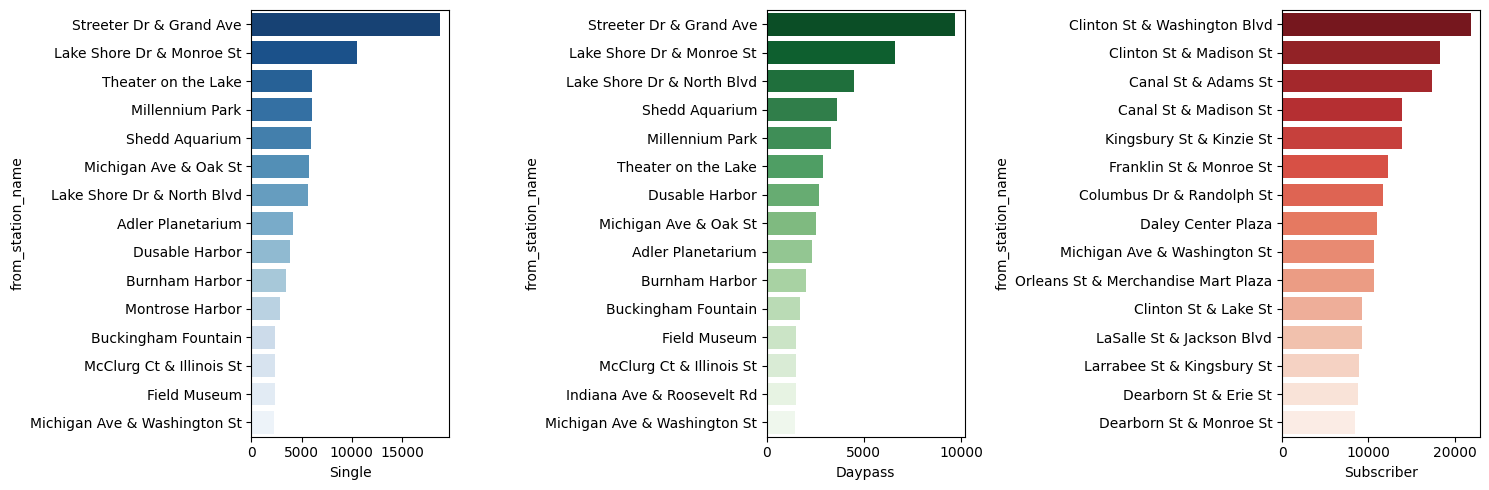

In [ ]:
#create top15 member and casual
single_top = df_longlat[['from_station_name','Single']].sort_values('Single', ascending=False).head(15)
daypass_top = df_longlat[['from_station_name','Daypass']].sort_values('Daypass', ascending=False).head(15)
sub_top = df_longlat[['from_station_name','Subscriber']].sort_values('Subscriber', ascending=False).head(15)
#fig1
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.barplot(y='from_station_name',x='Single',palette='Blues_r', data=single_top, ax=ax[0])
sns.barplot(y='from_station_name',x='Daypass',palette='Greens_r', data=daypass_top, ax=ax[1])
sns.barplot(y='from_station_name',x='Subscriber',palette='Reds_r', data=sub_top, ax=ax[2])
fig.tight_layout()
plt.show()

In [ ]:
#add rank
df_longlat['single_rank'] = df_longlat['Single'].rank(ascending=False)
df_longlat['daypass_rank'] = df_longlat['Daypass'].rank(ascending=False)
df_longlat['sub_rank'] = df_longlat['Subscriber'].rank(ascending=False)
#color code
def color(single_rank, sub_rank):
    if single_rank<=15 and sub_rank<=15:
        return 'orange'
    if single_rank<=15 and sub_rank>15:
        return 'lightgray'
    if single_rank>15 and sub_rank<=15:
        return 'blue'
    else:
        return ''

#add column color
df_longlat['color'] = df_longlat.apply(lambda row: color(row['single_rank'], row['sub_rank']), axis=1)

#create markers
marker = df_longlat.loc[df_longlat['color']!='']

#plot in folium
import folium
map2 = folium.Map(location=[marker.latitude.mean(), marker.longitude.mean()], zoom_start=12, width=500,height=500, control_scale=True, tiles='OpenStreetMap')
marker.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]], popup=row['from_station_name'], icon=folium.Icon(color=row['color'],icon_color='black')).add_to(map2), axis=1)

map2

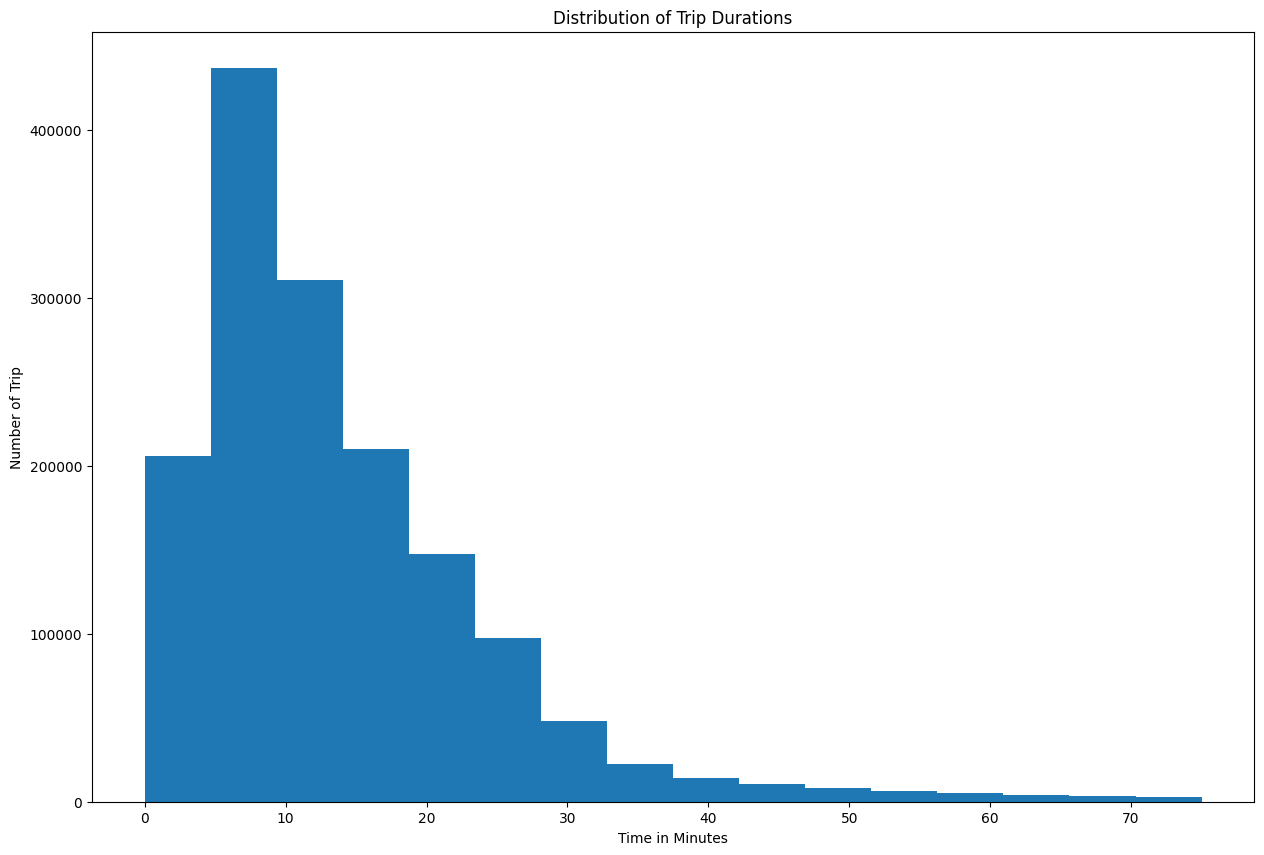

In [ ]:
trip_times= df_final['tripduration']/60
trip_times
# Plot the histogram of trip durations for Chicago users
f, (plt1) = plt.subplots(1, sharey=True)
plt1.hist(trip_times, range = (0, 75), bins = 16)
plt1.set_title('Distribution of Trip Durations')
plt1.set_xlabel('Time in Minutes')
plt1.set_ylabel("Number of Trip")

f.subplots_adjust(hspace=0.25)
f.set_figheight(10)
f.set_figwidth(15)
plt.show()